# 1. Thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('BTC_Dataset.csv')
df['ClosingPrice'] = df['Closing Price (USD)']/10000
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,ClosingPrice
0,2020-06-01,0.942767
1,2020-06-02,1.026858
2,2020-06-03,0.951614
3,2020-06-04,0.966706
4,2020-06-05,0.981137
...,...,...
381,2021-06-17,3.855748
382,2021-06-18,3.772202
383,2021-06-19,3.552045
384,2021-06-20,3.565630


In [3]:
#Lấy Date làm index

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)

### Vẽ sơ đồ minh họa

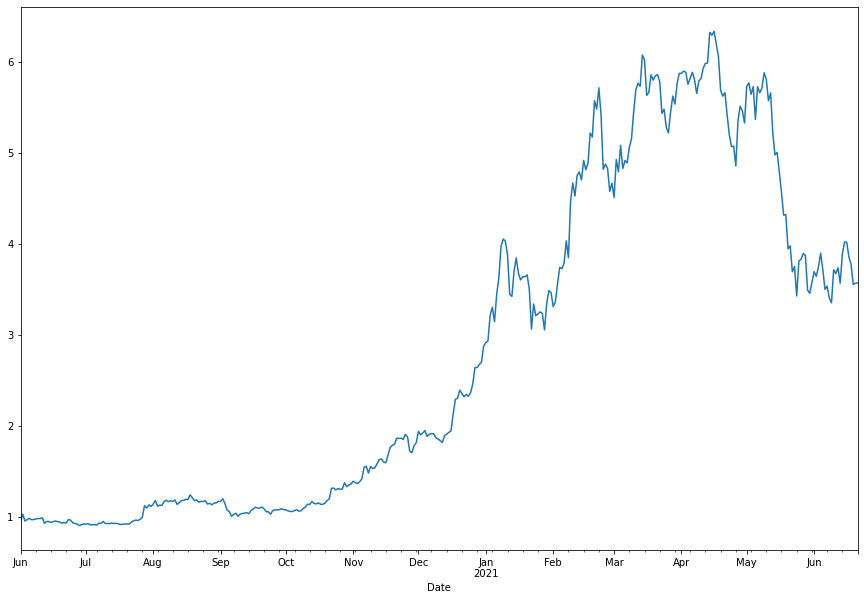

In [5]:
df['ClosingPrice'].plot(kind='line',figsize=(15, 10))

plt.show()

# 2. Tiền xử lý và Chia train/test

#### 2.1 Chi dữ liệu train test theo tỉ lệ train: 80%, test: 20%

In [6]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [7]:
price =df[['ClosingPrice']]
price

,ClosingPrice
Date,
2020-06-01,0.942767
2020-06-02,1.026858
2020-06-03,0.951614
2020-06-04,0.966706
2020-06-05,0.981137
...,...
2021-06-17,3.855748
2021-06-18,3.772202
2021-06-19,3.552045


In [8]:
price = np.array(price)
price

array([[0.94276701],
       [1.0268582 ],
       [0.95161354],
       [0.96670608],
       [0.98113671],
       [0.96596613],
       [0.9677051 ],
       [0.97374586],
       [0.97919279],
       [0.9786142 ],
       [0.9874967 ],
       [0.92608326],
       [0.94642281],
       [0.94586598],
       [0.93519537],
       [0.9441769 ],
       [0.95106606],
       [0.94576271],
       [0.93986421],
       [0.92797608],
       [0.93530782],
       [0.92891045],
       [0.96809471],
       [0.96096802],
       [0.93111363],
       [0.92526334],
       [0.91717321],
       [0.90221538],
       [0.91018501],
       [0.91880614],
       [0.91484449],
       [0.92363168],
       [0.90977974],
       [0.90943246],
       [0.91246535],
       [0.90554645],
       [0.92788056],
       [0.92444158],
       [0.947176  ],
       [0.92361433],
       [0.92431753],
       [0.92298598],
       [0.9286737 ],
       [0.92389938],
       [0.9260471 ],
       [0.92110264],
       [0.91337778],
       [0.916

In [9]:
train, test = price[0:train_size,:], price[train_size:len(df),:]
print(len(train), len(test))

308 78


# 3. Thực hiện mô hình ARIMA

In [10]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [11]:
arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-430.132, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-433.732, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-432.086, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-432.066, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-430.424, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.733 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  308
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 218.866
Date:                Sun, 27 Jun 2021   AIC                           -433.732
Time:                        00:01:35   BIC                           -426.278
Sample:                             0   HQIC                          -430.751
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0157      0.007      2.313      0.021       0.002       0.029
sigma2         0.0141      0.001     25.822      0.000       0.013       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               573.16
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):              40.61   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
ARIMA_predict = arima_model.predict(len(test))

# 4. Đánh giá mô hình ARIMA

In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
#MAPE
mean_absolute_percentage_error(test, ARIMA_predict.reshape(-1,1))

42.11052965627756

In [16]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test, ARIMA_predict.reshape(-1,1))
RMSE = math.sqrt(MSE)
print(RMSE)

2.0751558129458325
